# Introduction to Dimensionality Reduction

When working with machine learning models, datasets with too many features can cause issues like slow computation and overfitting. Dimensionality reduction helps to reduce the number of features while retaining key information. It converts high-dimensional data into a lower-dimensional space while preserving important details.

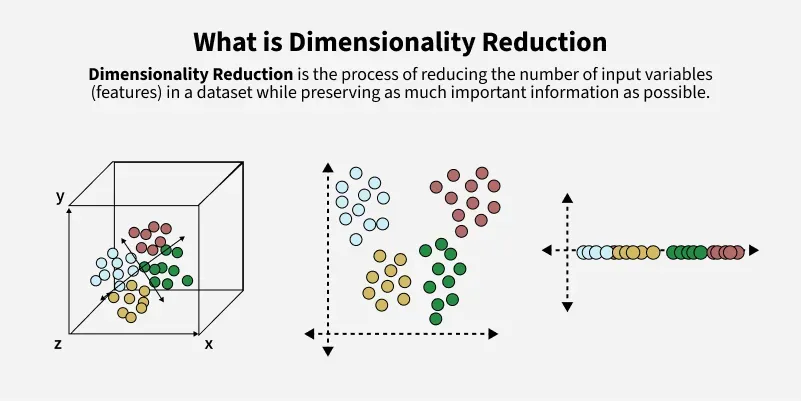

## How Dimensionality Reduction Works?

Lets understand how dimensionality Reduction is used with the help of example. Imagine a dataset where each data point exists in a 3D space defined by axes X, Y and Z. If most of the data variance occurs along X and Y then the Z-dimension may contribute very little to understanding the structure of the data.

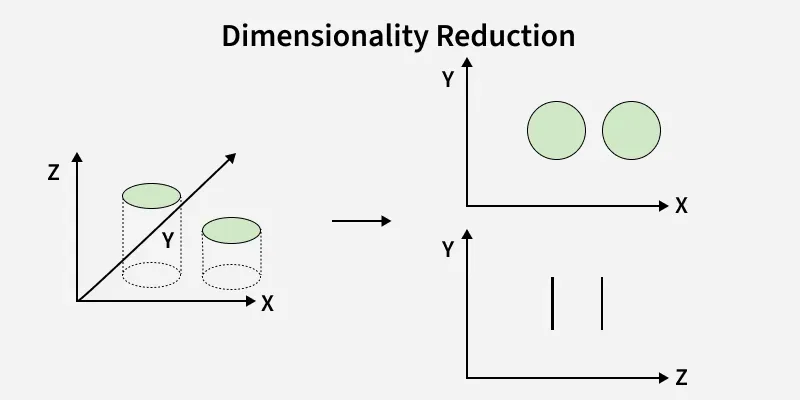

This process makes data analysis more efficient hence improving computation speed and visualization while minimizing redundancy

## Dimensionality Reduction Techniques

Dimensionality reduction techniques can be broadly divided into two categories:

1. **Feature Selection**: This method involves selecting a subset of the original features based on certain criteria, such as correlation with the target variable or importance scores from a model.
* Filter methods rank the features based on their relevance to the target variable.
* Wrapper methods use the model performance as the criteria for selecting features.
* Embedded methods combine feature selection with the model training process.

2. **Feature Extraction**: This method creates new features by transforming the original features into a lower-dimensional space. Common techniques include Principal Component Analysis (PCA) and t-Distributed Stochastic Neighbor Embedding (t-SNE).

* **Principal Component Analysis (PCA):** Converts correlated variables into uncorrelated principal components hence reducing dimensionality while maintaining as much variance as possible enabling more efficient analysis.
* **Missing Value Ratio:** Variables with missing data beyond a set threshold are removed, improving dataset reliability.
* **Backward Feature Elimination:** Starts with all features and removes the least significant ones in each iteration. The process continues until only the most impactful features remain, optimizing model performance.
* **Forward Feature Selection:** It begins with one feature, adds others incrementally and keeps those improving model performance.
* **Random Forest:** Random forest uses decision trees to evaluate feature importance, automatically selecting the most relevant features without the need for manual coding, enhancing model accuracy.
* **Factor Analysis:** Groups variables by correlation and keeps the most relevant ones for further analysis.
* **Independent Component Analysis (ICA):** Identifies statistically independent components, ideal for applications like ‘blind source separation’ where traditional correlation-based methods fall short.

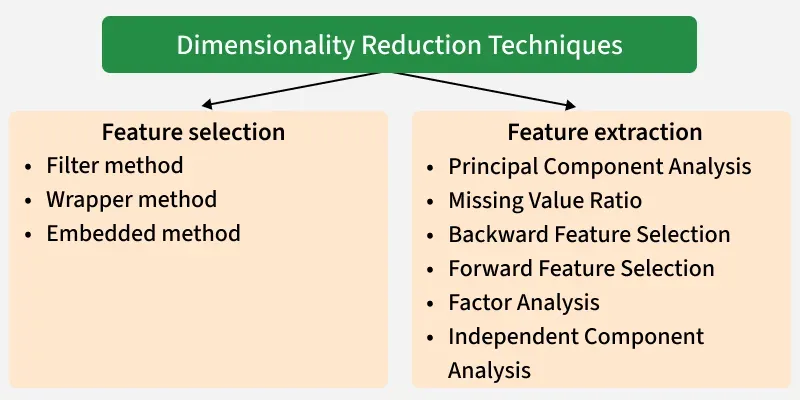

## Real World Use Case

* Text Categirization
* Image Recognition
* Genomics
* Recommender Systems
* Fraud Detection   
* Customer Segmentation

## Disadvantages

* Loss of Information: Reducing dimensions may lead to loss of important information.
* Interpretability: Transformed features may be harder to interpret.
* Computational Cost: Some techniques can be computationally expensive.

                                                      Principal Component Analysis (PCA)         

# Principal Component Analysis (PCA)

PCA (Principal Component Analysis) is a dimensionality reduction technique and helps us to reduce the number of features in a dataset while keeping the most important information. It changes complex datasets by transforming correlated features into a smaller set of uncorrelated components.

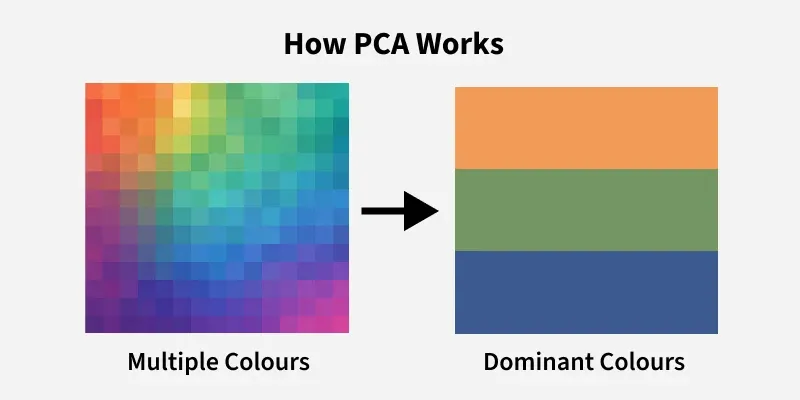

**It helps us to remove redundancy, improve computational efficiency and make data easier to visualize and analyze.**

## How Principal Component Analysis Works

PCA works by finding the directions (principal components) in which the data varies the most. The first principal component captures the most variance, the second captures the second most, and so on. By selecting a subset of these components, we can reduce the dimensionality of the dataset while retaining as much information as possible.

PCA uses linear algebra to transform data into new features called principal components. It finds these by calculating eigenvectors (directions) and eigenvalues (importance) from the covariance matrix. PCA selects the top components with the highest eigenvalues and projects the data onto them, simplifying the dataset.

**It prioritizes the directions where the data varies the most because more variation = more useful information.**

## Steps to Perform PCA

1. **Standardize the Data**: PCA is sensitive to the scale of the data, so it’s important to standardize the features to have a mean of zero and a standard deviation of one.

* A mean of 0
* A standard deviation of 1 

X_scaled = (X - mean) / std

2. **Calculate the Covariance Matrix**: This matrix captures how the features vary together. It helps to identify the relationships between features. The Covariance Matrix is calculated as:
Cov(X) = (1/n) * (X^T * X)

3. **Find the Principal Components**: This involves calculating the eigenvectors and eigenvalues of the covariance matrix. The eigenvectors represent the directions of maximum variance, while the eigenvalues indicate the amount of variance captured by each component.
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

4. **Select the Top Components**: Choose the top k eigenvectors based on their corresponding eigenvalues. These eigenvectors form the new feature space.
top_k_eigenvectors = eigenvectors[:, :k]

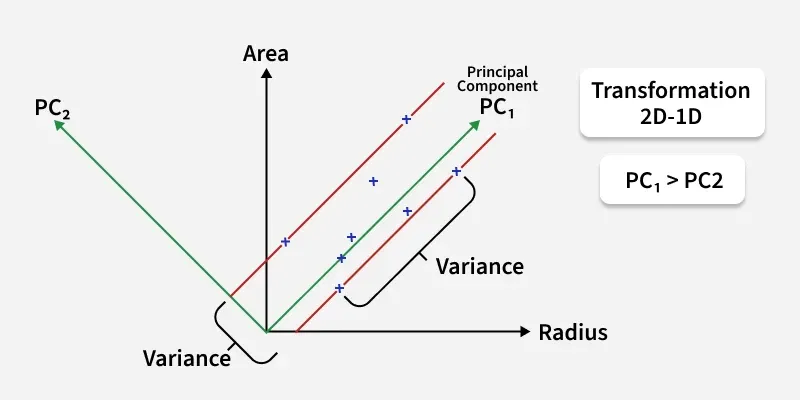

In the above image the original dataset has two features "Radius" and "Area" represented by the black axes. PCA identifies two new directions: PC₁ and PC₂ which are the principal components.

* These new axes are rotated versions of the original ones. PC₁ captures the maximum variance in the data meaning it holds the most information while PC₂ captures the remaining variance and is perpendicular to PC₁.
* The spread of data is much wider along PC₁ than along PC₂. This is why PC₁ is chosen for dimensionality reduction. By projecting the data points (blue crosses) onto PC₁ we effectively transform the 2D data into 1D and retain most of the important structure and patterns.

## Implementation of Principal Component Analysis in Python



In [1]:
# import liberaries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# Create a simple dataset

data = {
    'Height': [170, 165, 180, 175, 160, 172, 168, 177, 162, 158],
    'Weight': [65, 59, 75, 68, 55, 70, 62, 74, 58, 54],
    'Age': [30, 25, 35, 28, 22, 32, 27, 33, 24, 21],
    'Gender': [1, 0, 1, 1, 0, 1, 0, 1, 0, 0]  # 1 = Male, 0 = Female
}
df = pd.DataFrame(data)
print(df)

# Standardize the features

X = df.drop('Gender', axis=1)
y = df['Gender']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


   Height  Weight  Age  Gender
0     170      65   30       1
1     165      59   25       0
2     180      75   35       1
3     175      68   28       1
4     160      55   22       0
5     172      70   32       1
6     168      62   27       0
7     177      74   33       1
8     162      58   24       0
9     158      54   21       0


In [2]:
# Applying PCA algorithm

pca = PCA(n_components=2)  # Reduce to 2 dimensions
X_pca = pca.fit_transform(X_scaled)

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

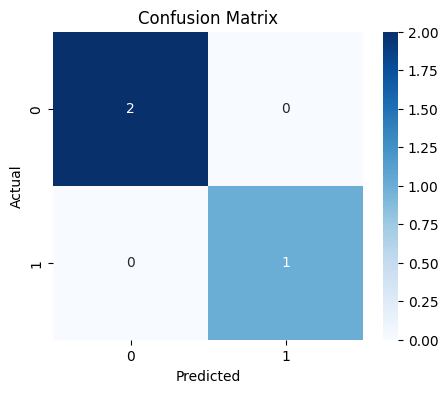

In [3]:
#  Evaluating with Confusion Matrix

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

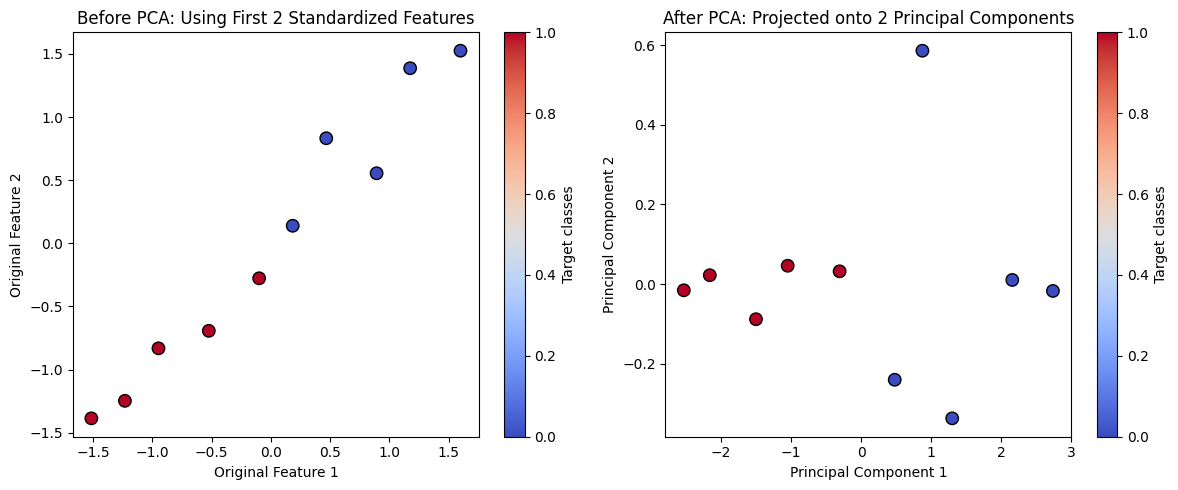

In [4]:
# Visualizing PCA Result

y_numeric = pd.factorize(y)[0]

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_numeric, cmap='coolwarm', edgecolor='k', s=80)
plt.xlabel('Original Feature 1')
plt.ylabel('Original Feature 2')
plt.title('Before PCA: Using First 2 Standardized Features')
plt.colorbar(label='Target classes')

plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_numeric, cmap='coolwarm', edgecolor='k', s=80)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('After PCA: Projected onto 2 Principal Components')
plt.colorbar(label='Target classes')

plt.tight_layout()
plt.show()

Left Plot Before PCA: This shows the original standardized data plotted using the first two features. There is no guarantee of clear separation between classes as these are raw input dimensions.

Right Plot After PCA: This displays the transformed data using the top 2 principal components. These new components capture the maximum variance often showing better class separation and structure making it easier to analyze or model.

### Advantages of Principal Component Analysis
* Reduces dimensionality while retaining important information.
* Improves computational efficiency.
* Helps to visualize high-dimensional data.
* Can enhance model performance by removing noise and redundancy.

### Disadvantages of Principal Component Analysis
* PCA is a linear technique and may not capture complex relationships in the data.
* The new principal components may be difficult to interpret.
* PCA can be sensitive to outliers which may skew the results.
